# Import relevant libraries at the start

In [118]:
import tensorflow as tf
import os

In [119]:
import cv2
import filetype
from matplotlib import pyplot as plt

In [120]:
data_dir = 'data'

In [121]:
os.listdir(data_dir)

['happy', 'sad']

In [122]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_230964014_ngHsPlPbY2MCa0enKBex6YLNdTB24pki.jpg',
 '1687d86811a2c25b877448ed47218131.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '35438_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '383627315.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '847a11866cbc10cddc6e32f6942be6c5.jpg',
 '8cEbMbgxi.jpg',
 '960x0.jpg',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'businesswoman-giving-high-five-male-260nw-2226244055.jpg',
 'dv2051009.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'freedom-serenity-concept-fe

In [123]:
image_exts = ['jpeg','jpg','bmp','png']


In [124]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            kind = filetype.guess(image_path)
            if kind is None or kind.extension not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path) 


In [125]:
# Reading an image as a numpy array

cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))

array([[[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       [[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       [[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       ...,

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]],

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]],

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]]

In [126]:
img = cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))

In [127]:
img.shape

(3844, 5125, 3)

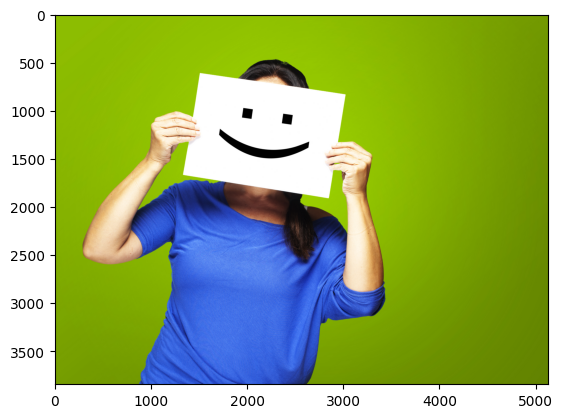

In [128]:
# Sample image is in RGB format

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Load Data

In [129]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [130]:
import numpy as np

In [131]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 186 files belonging to 2 classes.


In [132]:
data_iterator = data.as_numpy_iterator()

In [133]:
batch = data_iterator.next()

In [134]:
# Class 1 = Sad People
# Class 0 = Happy People

batch[1]

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

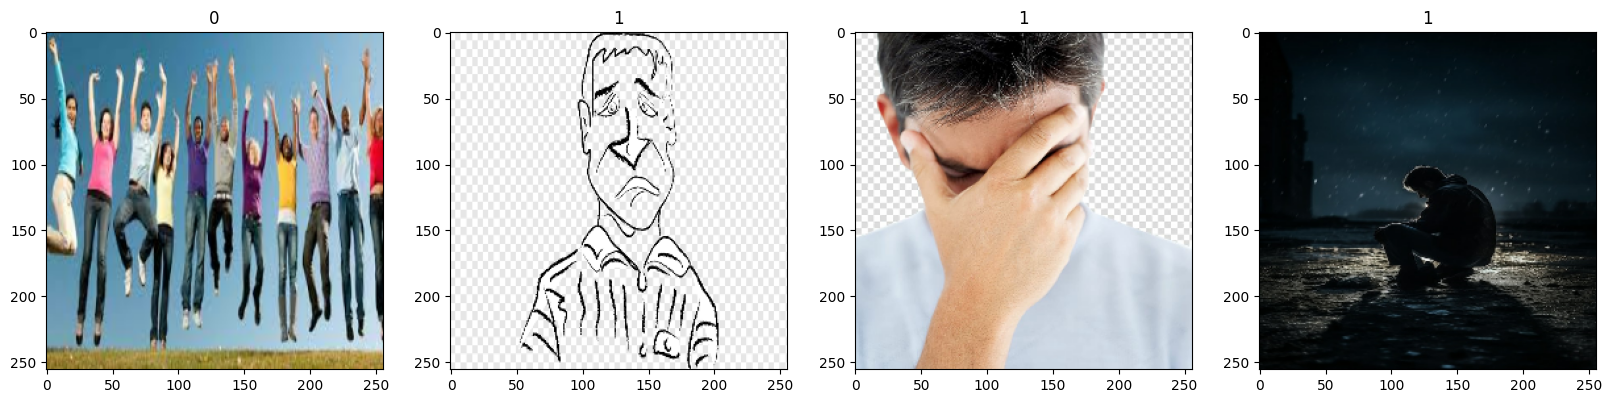

In [135]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

We can see that happy images are classified as class: 0 and sad images as class: 1.

# Data Preprocessing

## Scale Data

In [136]:
data = data.map(lambda x,y: (x/255, y))

In [167]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

## Split Data

In [168]:
len(data)

6

In [169]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [170]:
train_size

4

In [171]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build Deeplearning Model

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

In [192]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [193]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [194]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [195]:
logdir = "logs"

In [196]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [197]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.4969 - loss: 1.7780 - val_accuracy: 0.6250 - val_loss: 0.6703
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5417 - loss: 0.6650 - val_accuracy: 0.4375 - val_loss: 0.7432
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6021 - loss: 0.6556 - val_accuracy: 0.6562 - val_loss: 0.5658
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.7542 - loss: 0.5821 - val_accuracy: 0.7500 - val_loss: 0.5191
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7760 - loss: 0.5432 - val_accuracy: 0.8750 - val_loss: 0.4103
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7781 - loss: 0.4727 - val_accuracy: 0.7188 - val_loss: 0.5114
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7917 - loss: 0.4701 - val_accuracy: 0.8438 - val_loss: 0.3162
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.7823 - loss: 0.4303 - val_accuracy: 0.9688 - val_loss: 0.3485
Epoch 9/

## Plot Performance

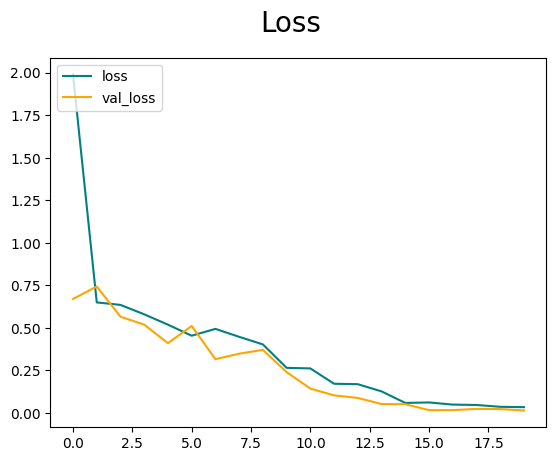

In [198]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

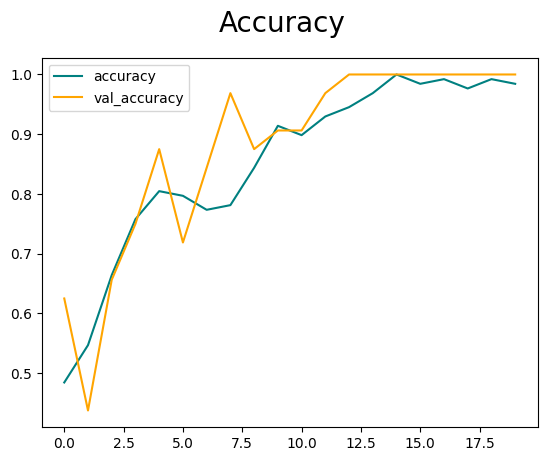

In [199]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

## Evaluate

In [200]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [201]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [203]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


In [204]:

print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## Test

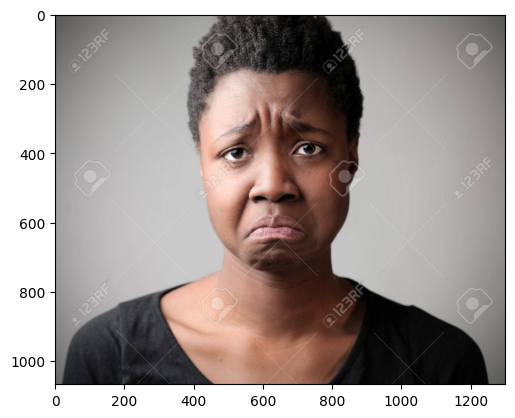

In [233]:
img = cv2.imread('sad_test3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [234]:
resize = tf.image.resize(img, (256,256))

In [235]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


In [236]:
yhat

array([[0.9999997]], dtype=float32)

In [237]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# Save the Model

In [238]:
from tensorflow.keras.models import load_model

In [241]:
model.save(os.path.join('models','CNN_happysad.h5'))


In [242]:
new_model = load_model(os.path.join('models','CNN_happysad.h5'))

In [243]:
new_model

<Sequential name=sequential_5, built=True>

In [244]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


array([[0.9999997]], dtype=float32)